```
http://bit.ly/VITMAV45-task2
```
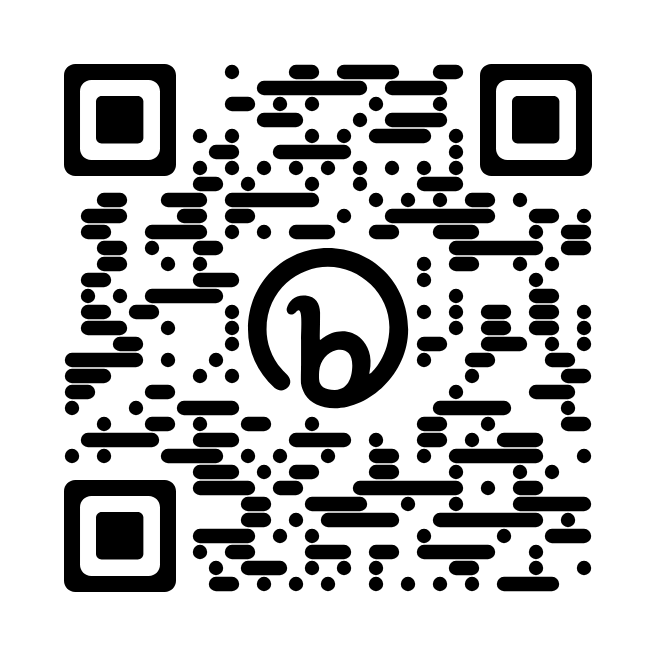

# Copyright

<PRE>
Jelen Jupyter notebook a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott "Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült.
A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A notebook bármely részének újra felhasználása, publikálása csak a szerzők írásos beleegyezése esetén megegengedett.

2020 (c) Gyires-Tóth Bálint (toth.b kukac tmit pont bme pont hu), Kalapos András
</PRE>

# Konvolúciós neurális hálózatok - feladat

Az előző gyakorlaton egyszerű MLP hálóval oldottuk meg a kézzel írt számjegyek osztályozásának problémáját az MNIST adatbázison. E feladat során ugyanezt a problémát nektek kell megoldani, konvolúciós hálót (CNN) használva.

Konvolúciós hálót az előző órán megismert MLP hálóhoz hasonló módon tudunk létrehozni, `Dense` rétegek helyett `Conv2D` réteget használva.

Keras  `Conv2D` kovolúciós réteg dokumentációja: https://keras.io/api/layers/convolution_layers/convolution2d/

```
Conv2D(filters=..., kernel_size=..., activation=..., input_shape=(...,...,...,))
```

A létrehozandó CNN architektúra:

|                 | filters/units | kernel _size/pool_size | activation |
| --------------- | :-----------: | :--------------------: | :--------: |
| Conv2D          |      32       |          5x5           |    relu    |
| Conv2D          |      64       |          5x5           |    relu    |
| MaxPooling2D    |       -       |          2x2           |     -      |
| Dropout(0.25)   |       -       |           -            |     -      |
| Flatten()       |       -       |           -            |     -      |
| Dense           |      128      |           -            |   'relu'   |
| Dropout(0.5)    |       -       |           -            |     -      |
| Dense (kimenet) |       ?       |           -            | 'softmax'  |


Néhány tanács:

* A tanítás előtt kapcsolátok be a GPU-t Colab alatt (Runtime/Change runtime type).
* Minibatch méret: 128
* Validációs halmaz mérete: 20%
* Optimalizációs algoritmus: Adam

**Fontos**
* A tanítás álljon le, ha a 10 epochon át nem javul a validációs hiba
* **A legjobb modelt mentse a tanítás a `model.hdf5` fájlba.**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

## Adatok betöltése és előkészítése

In [ ]:
# TODO: adatok betöltése, cél változók: x_train, y_train, x_test, y_test
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Az adatok előkészítését részben megírtuk előre
# Kékek átskálázása 0-255 tartományból 0.0-1.0 tartományba
x_train = x_train / 255
x_test = x_test / 255

# Képek tárolása kép jellegű tenzor elrendezésben (28x28-as felbontású képek)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [ ]:
# TODO: címkék (y_train, y_test) előkészítése osztályozáshoz


## Háló létrehozása, tanítása

In [ ]:
# TODO

In [ ]:
# TODO

## Kiértékelés

A kiértékelés kódját már (részben) előző gyakorlaton megismertük. Itt nincs feladatotok.

In [ ]:
from keras.models import load_model
model = load_model("model.hdf5")
test_err = model.evaluate(x_test,y_test)
print("Teszt hiba:", test_err[0], "Teszt pontosság:", test_err[1])

### Metrikák, tévesztési mátrix
Nézzük először, hogy hogyan tudjuk kiszámolni az osztályozáshoz tartozó legfontosabb metrikákat és hogyan tudjuk megjeleníteni a konfúziós mátrixot:

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
# először is nyerjük ki a predikciókat (valószínüség és hozzá tartozó pontosságot)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,1)
y_true = np.argmax(y_test,1)

print("test accuracy: %g" %(accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro"))
print("Recall", recall_score(y_true, y_pred, average="macro"))
print("f1_score", f1_score(y_true, y_pred, average="macro"))
print("\nKonfúziós mátrix: ")
conf=confusion_matrix(y_true, y_pred)
print(conf)

A tévesztési mátrixot vizuálisan is érdemes vizsgálni:

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True, fmt='d', vmax=20) # a vmax paraméterrel állítjuk be, hogy milyen értéktartományban jelenítse meg az adatokat

Eredmények beküldése: https://forms.gle/p4SbEAN6gLSaQvsr9

Vizsgáljuk meg a TensorBoard-ban a logokat:

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

### Aktíváció vizsgálata a convoluciós rétegekben
https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8 alapján

In [ ]:
#új modell készítése az aktivációs elemzéshez
from keras.models import Model
# Az első két réteger nézzük csak
layer_outputs = [layer.output for layer in model.layers[0:2]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

In [ ]:
#Kiválasztjuk a teszthalmaz első 4 képét
img = x_test[0:4].reshape(-1,28,28,1)
#Ezek a cimkék: 7,2,1,0
np.argmax(y_test[0:4],axis=1)

In [ ]:
#A 4 db képet ráadjuk a hálózatra:
activations = activation_model.predict(img)

In [ ]:
#Kigyűjtjük a rétegek neveit
layer_names = []
for layer in model.layers[0:2]:
    layer_names.append(layer.name)


In [ ]:
import matplotlib.pyplot as plt
images_per_row = 32
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    ns= layer_activation.shape[0]
    display_grid = np.zeros((size * n_cols*ns, images_per_row * size))
    for s in range(ns):
      for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[s,
                                             :, :,
                                             col * images_per_row + row]
            #Az aktivációt normalizálhatjuk is, ekkor kicsi más jellegű képeket kapuk. Érdemes kipróbálni True és False-al is
            #Új kép generálása előtt az aktivációt is generáljuk újra!
            if False:
              channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[(col) * size+ size * n_cols*s: (col + 1) * size+ size * n_cols*s, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Visszajelzés

[`https://bit.ly/VITMAV45-feedback`](https://bit.ly/VITMAV45-feedback)

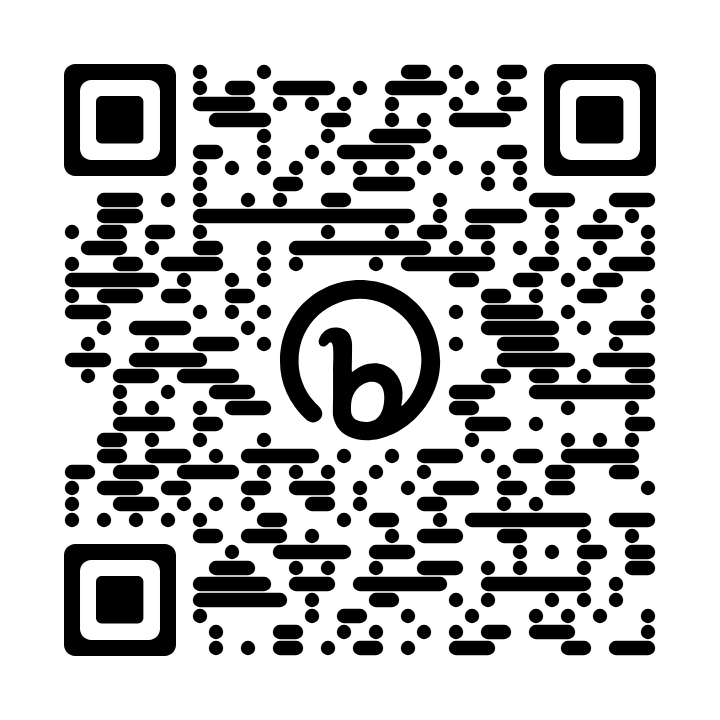